# **Part I - Loading libraries and data file**

In [ ]:
#Loading libraries
import pandas as pd
import numpy as np
import os
import re
from pandas import DataFrame
from nltk.corpus import stopwords
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import community 
import networkx as nx
from random import choice

In [ ]:
#Loading data
my_file = open("/content/DBLP_new_version.txt", "r",encoding="utf8")
type(my_file)
data=my_file.read()

# **Part II - Preprocessing**

In [ ]:
#Extraction of informations and creation of dataframe

class Article:
    def __init__(self):
        self.title = ''
        self.authors = []
        self.year = ''
        self.NomRevueOrConf = ''
        self.index = 0
        self.abstract = ''
        self.ref = []
    def __str__(self):
        return " \ntitle : \n"+self.title+ "\n authors : \n" + str(self.authors).strip('[]')+"\n year: \n "+self.year+"\n NomRefOrconf: \n "+ self.NomRevueOrConf+ "\n Index : \n "+ str(self.index) + "\n abstract : \n "+self.abstract + "\n ref : \n " + str(self.ref).strip('[]') +"\n "

def function1():
    listArticles = []
 
    items = []
    items = data.split('#*')

    for item in items:
        article = Article()
         
        item1 = item.split('#')
        title = ''
        title = item1[0]
        listeauthors,NomRevueOrConf,index,Listref,abstract,Year=[],'',0,[],'',''
        
        for x in item1:
            if x =='':
                continue
            if x[0]=='@':
                templist= x.split("\n")
                templist[0] = templist[0][1:]
                templist = list(filter(None, templist))
                listeauthors =templist
                templist=[]
            if x[0]=='c':
                NomRevueOrConf =x[1:]
            if x[0]=='i':
                index =x[5:]
            if x[0]=='%':
                Listref.append(x[1:].rstrip('\n'))

            if x[0]=='!':

                abstract =x[1:]
            if x[0]=='t':
                Year =x[1:]
      
                
        article.title=title
        article.authors=listeauthors
        article.year=Year
        article.NomRevueOrConf=NomRevueOrConf
        article.abstract=abstract
        article.index=index
        article.ref=Listref
        listArticles.append(article)
    
    listeTitle,listeauthors,listeYers,listNomRevueOrConf,listeindex,listeabstract,listeref,listenbrcitation=[],[],[],[],[],[],[],[]
    for article in listArticles:
        listeTitle.append(article.title)
        listeauthors.append(', '.join(article.authors))
        
        listeYers.append(article.year)
        listNomRevueOrConf.append(article.NomRevueOrConf)
        listeindex.append(article.index)
        listeabstract.append(article.abstract)
        listeref.append(', '.join(article.ref))
        listenbrcitation.append(len(article.ref))
  
    df1 = {'Title': listeTitle[1:], 'authors': listeauthors[1:],'Venue':listNomRevueOrConf[1:],'Year':listeYers[1:],'ID':listeindex[1:],'ListeCitations':listeref[1:],'NBRCitations':listeref[1:],'abstract':listeabstract[1:]}
    df = DataFrame(data=df1)
    df.NBRCitations = df.ListeCitations.str.count(',')+1
    df['NBRAuthors'] = df.authors.str.count(',')+1
    
    return df
    
df=function1()   

In [ ]:
#Informations about my data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596278 entries, 0 to 596277
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Title           596278 non-null  object
 1   authors         596278 non-null  object
 2   Venue           596278 non-null  object
 3   Year            596278 non-null  object
 4   ID              596278 non-null  object
 5   ListeCitations  596278 non-null  object
 6   NBRCitations    596278 non-null  int64 
 7   abstract        596278 non-null  object
 8   NBRAuthors      596278 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 40.9+ MB


In [ ]:
#Overview of my data
df.head()

,Title,authors,Venue,Year,ID,ListeCitations,NBRCitations,abstract,NBRAuthors
0,Formal models for expert finding in enterprise...,"Krisztian Balog,Leif Azzopardi,Maarten de Rijke",SIGIR\n,2006\n,594377\n,"595386, 362694, 772628, 595551, 26506, 594777,...",11,Searching an organization's document repositor...,3
1,Latent Semantic Indexing is an Optimal Special...,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",SIGIR\n,1992\n,594378\n,"771904, 2025",2,Latent Semantic Indexing (LSI) is a technique ...,3
2,Latent semantic-space: iterative scaling impro...,Rie Kubota Ando,SIGIR\n,2000\n,594379\n,"937405, 594378, 243650, 594808, 594831, 771716...",11,We present a novel algorithm that creates docu...,1
3,Automatic Combination of Multiple Ranked Retri...,"Brian T. Bartell,Garrison W. Cottrell,Richard ...",SIGIR\n,1994\n,594380\n,"1120095, 772280, 595299, 936910, 1120350, 595944",6,,3
4,Planning in an Expert System for Automated Inf...,"Christine Barthes,Pierre Glize",SIGIR\n,1988\n,594381\n,"595655, 594818, 594757, 3446",4,Searching online databases requires an informa...,2


In [ ]:
#Filter on SIGMOD Conference, STOC and SIGIR Venus
df01 = df[df.Venue.str.contains('(SIGMOD Conference)', regex=True)].sample(n=500)
df02 = df[df.Venue.str.contains('(STOC)', regex=True)].sample(n=500)
df03 = df[df.Venue.str.contains('(SIGIR)', regex=True)].sample(n=500)
df=pd.concat([df01,df02,df03])
df.info()

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 4629 to 1253
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Title           1500 non-null   object
 1   authors         1500 non-null   object
 2   Venue           1500 non-null   object
 3   Year            1500 non-null   object
 4   ID              1500 non-null   object
 5   ListeCitations  1500 non-null   object
 6   NBRCitations    1500 non-null   int64 
 7   abstract        1500 non-null   object
 8   NBRAuthors      1500 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 117.2+ KB


In [ ]:
#Export the dataframe
df.to_csv(r'df.csv', index=False, header=True)

In [ ]:
#Loading new data
df=pd.read_csv("/content/df.csv")
print("Dimension of data: ", df.shape)
print("\nColumns:")
print(df.columns.values)
print("\nOverview of data:")
df.head()

Dimension of data:  (1500, 9)

Columns:
['Title' 'authors' 'Venue' 'Year' 'ID' 'ListeCitations' 'NBRCitations'
 'abstract' 'NBRAuthors']

Overview of data:


,Title,authors,Venue,Year,ID,ListeCitations,NBRCitations,abstract,NBRAuthors
0,Covering indexes for branching path queries.\n,"Raghav Kaushik,Philip Bohannon,Jeffrey F. Naug...",SIGMOD Conference\n,2002,599006,"1060189, 642616, 622597, 304160, 300784, 62307...",12,"In this paper, we ask if the traditional relat...",4
1,Incomplete Information and Dependencies in Rel...,"Tomasz Imielinski,Witold Lipski Jr.",SIGMOD Conference\n,1983,598910,"1058541, 832481, 642837, 950747, 545166, 26445...",10,An incomplete information relational database ...,2
2,An Architecture for Query Optimization.\n,"Arnon Rosenthal,David S. Reiner",SIGMOD Conference\n,1982,599628,"375481, 598144, 891741, 183439, 598027, 643222...",11,We describe an optimizer for relational querie...,2
3,Gigascope: A Stream Database for Network Appli...,"Charles D. Cranor,Theodore Johnson,Oliver Spat...",SIGMOD Conference\n,2003,598447,"299385, 598446, 598718, 544800",4,"We have developed Gigascope, a stream database...",4
4,On Parallel Processing of Aggregate and Scalar...,"Michael Jaedicke,Bernhard Mitschang",SIGMOD Conference\n,1998,598933,"1137978, 642097, 598268, 2314, 642288, 642311,...",31,Nowadays parallel object-relational DBMS are e...,2


In [ ]:
#Drop missing values
df=df.dropna()
#df.isna().sum()

In [ ]:
#Export new data for Qlik sense
df.to_csv(r'df.csv', index=False, header=True)

In [ ]:
#Stopwords
import nltk
nltk.download('stopwords')
stop_words=stopwords.words('english')+["a","about","above","across","after","afterwards","again","against","al ","all","almost","alone","along","already","also","although","always","am  ","among","amongst","an","analyze","and","another","any","anyhow","anyone","anything","anywhere","applicable","apply","are","around","as","assume","at","be","became","because","become","becomes","becoming","been","before","beforehand","being","below","beside","besides","between","beyond","both","but","by","came","cannot","cc  ","cm  ","come","compare","could","de  ","dealing","department","depend","did","discover","dl  ","do","does","during","each","ec","ed","effected","eg","either","else","elsewhere","enough","et  ","etc","ever","every","everyone","everything","everywhere","except","find","for","found","from","further","get","give","go","gov","had","has","have","he","hence","her","here","hereafter","hereby","herein","hereupon","hers","herself","him","himself","his","how","however","hr  ","ie","if","ii  ","iii  ","in","inc","incl","indeed","into","investigate","is","it","its","itself","j","jour","journal","just","kg  ","last","latter","latterly","lb  ","ld ","letter","like","ltd","made","make","many","may","me","meanwhile","mg  ","might","ml  ","mm  ","mo  ","more","moreover","most","mostly","mr","much","must","my","myself","namely","neither","never","nevertheless","next","no","nobody","noone","nor","not","nothing","now","nowhere","of","off","often","on","only","onto","or","other","others","otherwise","our","ours","ourselves","out","over","own","oz  ","per","perhaps","pm  ","precede","presently","previously","pt  ","rather","regarding","relate","said","same","seem","seemed","seeming","seems","seriously","several","she","should","show","showed","shown","since","so","some","somehow","someone","something","sometime","sometimes","somewhere","still","studied","sub ","such","take","tell","th  ","than","that","the","their","them","themselves","then","thence","there","thereafter","thereby","therefore","therein","thereupon","these","they","this","thorough","those","though","through","throughout","thru","thus","to","together","too","toward","towards","try","type","ug  ","under","unless","until","up","upon","us","used","using","various","very","via","was","we","were","what","whatever","when","whence","whenever","where","whereafter","whereas","whereby","wherein","whereupon","wherever","whether","which","while","whither","who","whoever","whom","whose","why","will","with","within","without","wk","would","wt","yet","you","your","yours","yourself","yourselves","yr"]
stop_words=np.unique(stop_words).tolist()
print(stop_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'ain', 'al ', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'am  ', 'among', 'amongst', 'an', 'analyze', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anywhere', 'applicable', 'apply', 'are', 'aren', "aren't", 'around', 'as', 'assume', 'at', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'but', 'by', 'came', 'can', 'cannot', 'cc  ', 'cm  ', 'come', 'compare', 'could', 'couldn', "couldn't", 'd', 'de  ', 'dealing', 'department', 'depend', 'did', 'didn', "didn't", 'discover', 'dl  ', 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'ec', 'ed', 'effected', 'eg', 'either', 'else', 'elsewhere', 'enough', '

# **Part III - Creating the matrices**

### **Documents-terms matrix for titles**

In [ ]:
#Doc-terms matrix for titles
import nltk
nltk.download('wordnet')
print(df['Title'])
##Cleaning
#df=df.dropna(subset=['Title'])
df['Title']=df['Title'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['Title']=df['Title'].str.replace('[^\w\s]',' ')
df['Title']=df['Title'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words))
df['Title']=df['Title'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split(" ")]))
df['Title'] =df['Title'] .str.replace('[\d]','')
print("\nAfter cleaning :")
print("\n",df['Title'])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
0          Covering indexes for branching path queries.\n
1       Incomplete Information and Dependencies in Rel...
2               An Architecture for Query Optimization.\n
3       Gigascope: A Stream Database for Network Appli...
4       On Parallel Processing of Aggregate and Scalar...
                              ...                        
1488    Vector-Space Ranking with Effective Early Term...
1490    An interactive algorithm for asking and incorp...
1491    Document Language Models, Query Models, and Ri...
1492    User-Specified Domain Knowledge for Document R...
1498                    Query word deletion prediction.\n
Name: Title, Length: 888, dtype: object

After cleaning :

 0                     covering index branching path query
1       incomplete information dependency relational d...
2                         architecture query optimization
3           g

In [ ]:
#doc-title matrix
title_vectorizer = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1), analyzer="word")
title_term_count = title_vectorizer.fit_transform(df["Title"])
title_term_count_d = title_term_count.todense()
print((title_term_count_d).shape)
print("\n",title_vectorizer.get_feature_names())

mat_doc_title=title_term_count.toarray()
print("\n",mat_doc_title)

(888, 1000)

 ['abstract', 'access', 'accessing', 'acm', 'action', 'active', 'ad', 'adapting', 'adaptive', 'addition', 'aggregate', 'aggregation', 'agreement', 'aided', 'algebra', 'algebraic', 'algorithm', 'allocation', 'analysis', 'answer', 'answering', 'application', 'approach', 'approximate', 'approximately', 'approximating', 'approximation', 'aqualogic', 'architecture', 'area', 'array', 'arthur', 'assessing', 'association', 'asymmetric', 'asynchronous', 'automated', 'automatic', 'automaton', 'average', 'aware', 'balanced', 'balancing', 'bandwidth', 'base', 'based', 'bayes', 'bayesian', 'bea', 'behaviour', 'best', 'better', 'biased', 'bin', 'binary', 'biomedical', 'bit', 'bloom', 'boolean', 'bootstrapping', 'bottleneck', 'bound', 'bounded', 'branching', 'broadcast', 'building', 'cache', 'caching', 'calculus', 'candidate', 'case', 'categorization', 'centric', 'certain', 'challenge', 'characterization', 'chinese', 'circuit', 'class', 'classification', 'classifier', 'cleaning', 'closur

In [ ]:
# Add the column "ID" to doc-title matrix
#df_doc_title = pd.DataFrame(data=title_term_count_d, columns= title_vectorizer.get_feature_names())
df_doc_title = pd.DataFrame(data=title_term_count_d, columns= title_vectorizer.get_feature_names(),index=df.ID)
#df_doc_title=pd.concat([df['ID'],df_doc_title], axis=1)
print(df_doc_title.shape)
df_doc_title.head()

(888, 1000)


,abstract,access,accessing,acm,action,active,ad,adapting,adaptive,addition,aggregate,aggregation,agreement,aided,algebra,algebraic,algorithm,allocation,analysis,answer,answering,application,approach,approximate,approximately,approximating,approximation,aqualogic,architecture,area,array,arthur,assessing,association,asymmetric,asynchronous,automated,automatic,automaton,average,...,weight,weighting,welfare,whip,white,wide,width,wildcard,wildcards,williamson,window,winner,wire,wireless,wisa,wise,word,work,worker,workflow,workload,workshop,workspace,workstation,world,worm,worst,wrapping,writer,wsq,xanadue,xcache,xmill,xml,xquery,xrpc,xsb,xseq,yahoo,zero
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
599006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598933,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Export the dataframe of doc-title matrix
df_doc_title.to_csv(r'df_doc_title.csv', index=True, header=True)

### **Documents-terms matrix for abstract**

In [ ]:
##Doc-terms matrix for abstract
print(df['abstract'])
##Cleaning
#df=df.dropna(subset=['abstract'])
df['abstract']=df['abstract'].apply(lambda x:" ".join(x.lower() for x in x.split()))
df['abstract']=df['abstract'].str.replace('[^\w\s]',' ')
df['abstract']=df['abstract'].apply(lambda x:" ".join(x for x in x.split() if x not in stop_words))
df['abstract']=df['abstract'].apply(lambda x:" ".join([Word(word).lemmatize() for word in x.split(" ")]))
df['abstract'] =df['abstract'] .str.replace('[\d]','')
print("\nAfter cleaning: ")
print("\n",df['abstract'])

0       In this paper, we ask if the traditional relat...
1       An incomplete information relational database ...
2       We describe an optimizer for relational querie...
3       We have developed Gigascope, a stream database...
4       Nowadays parallel object-relational DBMS are e...
                              ...                        
1488    Considerable research effort has been invested...
1490    Standard machine learning techniques typically...
1491    We present a framework for information retriev...
1492    The introduction of domain knowledge into a do...
1498    Web search query logs contain traces of users'...
Name: abstract, Length: 888, dtype: object

After cleaning: 

 0       paper ask traditional relational query acceler...
1       incomplete information relational database com...
2       describe optimizer relational query database s...
3       developed gigascope stream database network ap...
4       nowadays parallel object relational dbms envis...
         

In [ ]:
#doc_abstract matrix
abstract_vectorizer = CountVectorizer(max_features=1500, lowercase=True, ngram_range=(1,1), analyzer="word")
abstract_term_count = abstract_vectorizer.fit_transform(df["abstract"])
abstract_term_count_d = abstract_term_count.todense()
print((abstract_term_count_d).shape)
print("\n",abstract_vectorizer.get_feature_names())

mat_doc_abstract=abstract_term_count.toarray()
print("\n",mat_doc_abstract)

(888, 1500)

 ['ability', 'able', 'abstract', 'acceptable', 'access', 'accessed', 'according', 'account', 'accuracy', 'accurate', 'achieve', 'achieved', 'achieves', 'achieving', 'acm', 'act', 'action', 'active', 'activity', 'actual', 'actually', 'ad', 'adapt', 'adaptive', 'add', 'added', 'adding', 'addition', 'additional', 'address', 'addressed', 'adt', 'advanced', 'advantage', 'adversary', 'affect', 'aggregate', 'aggregation', 'aim', 'al', 'aldsp', 'algebra', 'algebraic', 'algorithm', 'algorithmic', 'allocation', 'allow', 'allowed', 'allowing', 'allows', 'alphabet', 'alternative', 'amount', 'analysis', 'analytical', 'analyzed', 'analyzing', 'annotation', 'answer', 'answering', 'appear', 'appears', 'application', 'applied', 'applying', 'approach', 'appropriate', 'approximate', 'approximating', 'approximation', 'arbitrarily', 'arbitrary', 'architecture', 'area', 'argue', 'argument', 'arise', 'arises', 'arithmetic', 'array', 'art', 'article', 'aspect', 'assigned', 'assignment', 'associat

In [ ]:
# Add the column "ID" to doc-abstract matrix
df_doc_abstract = pd.DataFrame(data=abstract_term_count_d, columns= abstract_vectorizer.get_feature_names(),index=df.ID)
print(df_doc_abstract.shape)
df_doc_abstract.head()

(888, 1500)


,ability,able,abstract,acceptable,access,accessed,according,account,accuracy,accurate,achieve,achieved,achieves,achieving,acm,act,action,active,activity,actual,actually,ad,adapt,adaptive,add,added,adding,addition,additional,address,addressed,adt,advanced,advantage,adversary,affect,aggregate,aggregation,aim,al,...,video,view,virtual,visual,vocabulary,volcano,volume,walk,want,warehouse,way,weak,web,weight,weighted,weighting,well,wide,widely,window,wise,word,work,working,workload,world,worst,write,writer,written,www,xi,xml,xquery,xrpc,xsb,yahoo,year,yield,zero
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
599006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
598910,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599628,0,0,0,0,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Export the dataframe of doc-abstract matrix
df_doc_abstract.to_csv(r'df_doc_abstract.csv', index=True, header=True)

### **Documents-Authors matrix**

In [ ]:
#Doc-authors matrix and authors dataframe preprocessing
##List of authors
#df=df.dropna(subset=['authors'])
df['authors'] = df['authors'].str.lower()
df['authors']= df['authors'].str.strip()
df['authors'] = df['authors'].str.split(',')

all_authors = []
for index, row in df.iterrows():
  for author in row['authors']:
    if author not in all_authors:
      all_authors.append(author)

print(all_authors)

['raghav kaushik', 'philip bohannon', 'jeffrey f. naughton', 'henry f. korth', 'tomasz imielinski', 'witold lipski jr.', 'arnon rosenthal', 'david s. reiner', 'charles d. cranor', 'theodore johnson', 'oliver spatscheck', 'vladislav shkapenyuk', 'michael jaedicke', 'bernhard mitschang', 'sanjay agrawal', 'vivek r. narasayya', 'beverly yang', 'wilburt labio', 'ramana yerneni', 'hector garcia-molina', 'ming hua', 'jian pei', 'felipe cariño', 'pekka kostamaa', 'art kaufmann', 'john burgess', 'michael doherty', 'richard hull', 'mohammed rupawalla', 'olga de troyer', 'edward p. f. chan', 'latha s. colby', 'timothy griffin', 'leonid libkin', 'inderpal singh mumick', 'howard trickey', 'ronald fagin', 'guy m. lohman', 'joseph c. stoltzfus', 'anita n. benson', 'michael d. martin', 'alfonso f. cardenas', 'rakesh agrawal', 'narain h. gehani', 'j. srinivasan', 'swarup acharya', 'rafael alonso', 'michael j. franklin', 'stanley b. zdonik', 'kevin chen-chuan chang', 'junghoo cho', 'foto n. afrati', 'c

In [ ]:
#Authors dataframe
df_authors = pd.DataFrame({'authors':all_authors})
df_authors["id_authors"] = df_authors.index

print(df_authors.shape)
df_authors.head(10)

(1732, 2)


,authors,id_authors
0,raghav kaushik,0
1,philip bohannon,1
2,jeffrey f. naughton,2
3,henry f. korth,3
4,tomasz imielinski,4
5,witold lipski jr.,5
6,arnon rosenthal,6
7,david s. reiner,7
8,charles d. cranor,8
9,theodore johnson,9


In [ ]:
#Export authors dataframe
df_authors.to_csv(r'df_authors.csv', index=False, header=True)

In [ ]:
#doc-authors matrix
doc_authors_count=np.zeros((len(df), len(all_authors)), dtype=int)
author_map = {x:i for i,x in enumerate(all_authors)}

for index, row in df.reset_index().iterrows():
  for author in row["authors"]:
    doc_authors_count[index, author_map[author]] = 1

print(len(doc_authors_count))
print(doc_authors_count)

888
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
# Add the column "ID" to doc-authors matrix
df_doc_authors = pd.DataFrame(data=doc_authors_count,columns= all_authors, index=df.ID)
print(df_doc_authors.shape)
df_doc_authors.head()

(888, 1732)


,raghav kaushik,philip bohannon,jeffrey f. naughton,henry f. korth,tomasz imielinski,witold lipski jr.,arnon rosenthal,david s. reiner,charles d. cranor,theodore johnson,oliver spatscheck,vladislav shkapenyuk,michael jaedicke,bernhard mitschang,sanjay agrawal,vivek r. narasayya,beverly yang,wilburt labio,ramana yerneni,hector garcia-molina,ming hua,jian pei,felipe cariño,pekka kostamaa,art kaufmann,john burgess,michael doherty,richard hull,mohammed rupawalla,olga de troyer,edward p. f. chan,latha s. colby,timothy griffin,leonid libkin,inderpal singh mumick,howard trickey,ronald fagin,guy m. lohman,joseph c. stoltzfus,anita n. benson,...,christine barthes,pierre glize,yoshimasa tsuruoka,jun-ichi tsujii,jun wang,marcel j. t. reinders,reginald l. lagendijk,johan a. pouwelse,e. michael keen,mohan kamath,peter müller,murray wood,ian sommerville,gordon bell,jim gemmell,roger lueder,s. gallelli,c. iacobelli,p. marchisio,xi chen,donald metzler,bernard j. jansen,deniz aktug,márcio l. a. vidal,altigran soares da silva,edleno silva de moura,joão m. b. cavalcanti,ben carterette,joshua lewis,p. bruce berra,philip j. cowans,paul thomas,trevor strohman,khurshid ahmad,bogdan vrusias,paulo c. f. de oliveira,vo ngoc anh,owen de kretser,hema raghavan,daniel c. fain
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
599006,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598910,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599628,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598447,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598933,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Export the dataframe of doc-authors matrix
df_doc_authors.to_csv(r'df_doc_authors.csv', index=True, header=True)

### **Document-Documents matrix**

In [ ]:
#Doc-citations matrix and ListeCitations dataframe preprocessing
##List of citations
#df=df.dropna(subset=['ListeCitations'])
df['ListeCitations']= df['ListeCitations'].str.strip()
df['ListeCitations'] = df['ListeCitations'].str.split(',')

all_citations = []
for index, row in df.iterrows():
  for citation in row['ListeCitations']:
    if citation not in all_citations:
      all_citations.append(citation)

print(all_citations)

['1060189', ' 642616', ' 622597', ' 304160', ' 300784', ' 623077', ' 2294', ' 642352', ' 642069', ' 643719', ' 597570', ' 627554', '1058541', ' 832481', ' 642837', ' 950747', ' 545166', ' 26445', ' 1118457', ' 1118520', ' 492', ' 643934', '375481', ' 598144', ' 891741', ' 183439', ' 598027', ' 643222', ' 599627', ' 644000', ' 1118735', ' 777098', ' 1118567', '299385', ' 598446', ' 598718', ' 544800', '1137978', ' 642097', ' 598268', ' 2314', ' 642288', ' 642311', ' 642377', ' 771165', ' 598260', ' 832546', ' 844585', ' 1112850', ' 642702', ' 598853', ' 642759', ' 598852', ' 599158', ' 643264', ' 372671', ' 615418', ' 599430', ' 844890', ' 599519', ' 643707', ' 599709', ' 301171', ' 845037', ' 2364', ' 856209', ' 644049', ' 819844', '1118626', ' 938404', ' 599568', ' 300056', ' 641830', ' 641867', ' 642303', ' 1127842', ' 599406', ' 641777', ' 643824', ' 643624', '597990', ' 641953', ' 598415', ' 598416', ' 598724', ' 176296', ' 598781', ' 304022', ' 598831', ' 642825', ' 599385', ' 638

In [ ]:
#doc-citations matrix
doc_citations_count=np.zeros((len(df), len(all_citations)), dtype=int)
citations_map = {x:i for i,x in enumerate(all_citations)}

for index, row in df.reset_index().iterrows():
  for citation in row["ListeCitations"]:
    doc_citations_count[index, citations_map[citation]] = 1

print(len(doc_citations_count))
print(doc_citations_count.shape)
print(doc_citations_count)

888
(888, 6498)
[[1 1 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 0 0 0]]


In [ ]:
# Add the column "ID" to doc-citations matrix
df_doc_citations = pd.DataFrame(data=doc_citations_count,columns= all_citations, index=df.ID)
df_doc_citations.head()

,1060189,642616,622597,304160,300784,623077,2294,642352,642069,643719,597570,627554,1058541,832481,642837,950747,545166,26445,1118457,1118520,492,643934,375481,598144,891741,183439,598027,643222,599627,644000,1118735,777098,1118567,299385,598446,598718,544800,1137978,642097,598268,...,594528,49009,49058,770457,599618,418587,418887,598882,598098,595551,595557,794237,641952,96264,673663,793387,674089,595712,594652,96267,594494,594721,595786,523745,936438,511253,816736,936346,595638,1009332,621259,595119,985227,937019,949996,594797,595277,595714,832504,41513
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
599006,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598910,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599628,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
598933,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Export the dataframe of doc-citations matrix
df_doc_citations.to_csv(r'df_doc_citations.csv', index=True, header=True)

# **Part IV - Clustering and Consensus**

### **Adjacency matrix**

In [ ]:
#Adjacency matrix doc_terms (titles)
from numpy import ndarray
adj_title=mat_doc_title.dot(mat_doc_title.T)
print("Adjacency matrix size : ",adj_title.shape)
print("\nAdjacency matrix :")
print("\n",adj_title)

Adjacency matrix size :  (888, 888)

Adjacency matrix :

 [[ 4  0  1 ...  1  0  1]
 [ 0  4  0 ...  1  0  0]
 [ 1  0  3 ...  1  0  1]
 ...
 [ 1  1  1 ... 10  2  1]
 [ 0  0  0 ...  2  5  0]
 [ 1  0  1 ...  1  0  4]]


In [ ]:
#Adjacency matrix doc_terms (abstract)
#from numpy import ndarray
adj_abstract=mat_doc_abstract.dot(mat_doc_abstract.T)
print("djacency matrix size : ",adj_abstract.shape)
print("\nAdjacency matrix :")
print("\n",adj_abstract)

djacency matrix size :  (888, 888)

Adjacency matrix :

 [[366  21  53 ...  52   9  28]
 [ 21 130  17 ...  29   6   5]
 [ 53  17 165 ...  45   7  22]
 ...
 [ 52  29  45 ... 323  47  59]
 [  9   6   7 ...  47  91  13]
 [ 28   5  22 ...  59  13 104]]


In [ ]:
#Adjacency matrix doc_authors
#from numpy import ndarray
adj_author=doc_authors_count.dot(doc_authors_count.T)
print("djacency matrix size : ",adj_author.shape)
print("\nAdjacency matrix  :")
print("\n",adj_author)

djacency matrix size :  (888, 888)

Adjacency matrix  :

 [[4 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 2]]


In [ ]:
#Adjacency matrix doc_citations
#from numpy import ndarray
adj_citations=doc_citations_count.dot(doc_citations_count.T)
print("Dimension de la matrice d'adjacence : ",adj_citations.shape)
print("\nLa matrice d'adjacence :")
print("\n",adj_citations)

Dimension de la matrice d'adjacence :  (888, 888)

La matrice d'adjacence :

 [[12  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0 11 ...  0  0  0]
 ...
 [ 0  0  0 ...  9  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  3]]


## **Co-terms graphs and Louvain algorithm**

### **Titles**

partition {0: 0, 1: 1, 2: 0, 3: 1, 4: 2, 5: 1, 6: 3, 7: 4, 8: 4, 9: 1, 10: 1, 11: 2, 12: 2, 13: 1, 14: 1, 15: 1, 16: 4, 17: 5, 18: 0, 19: 2, 20: 6, 21: 4, 22: 3, 23: 4, 24: 4, 25: 2, 26: 5, 27: 0, 28: 4, 29: 4, 30: 1, 31: 0, 32: 1, 33: 1, 34: 5, 35: 3, 36: 6, 37: 1, 38: 3, 39: 1, 40: 4, 41: 0, 42: 2, 43: 4, 44: 4, 45: 5, 46: 1, 47: 2, 48: 0, 49: 6, 50: 4, 51: 3, 52: 3, 53: 0, 54: 7, 55: 1, 56: 4, 57: 0, 58: 3, 59: 6, 60: 4, 61: 0, 62: 6, 63: 1, 64: 0, 65: 1, 66: 2, 67: 0, 68: 0, 69: 3, 70: 0, 71: 4, 72: 0, 73: 1, 74: 4, 75: 2, 76: 5, 77: 0, 78: 7, 79: 2, 80: 0, 81: 1, 82: 1, 83: 4, 84: 1, 85: 0, 86: 4, 87: 1, 88: 1, 89: 2, 90: 4, 91: 0, 92: 8, 93: 1, 94: 4, 95: 2, 96: 0, 97: 6, 98: 6, 99: 7, 100: 1, 101: 1, 102: 1, 103: 4, 104: 1, 105: 4, 106: 4, 107: 1, 108: 4, 109: 4, 110: 4, 111: 1, 112: 2, 113: 1, 114: 5, 115: 4, 116: 2, 117: 1, 118: 4, 119: 2, 120: 0, 121: 2, 122: 0, 123: 4, 124: 0, 125: 4, 126: 4, 127: 1, 128: 1, 129: 3, 130: 4, 131: 4, 132: 0, 133: 2, 134: 3, 135: 6, 136: 0, 137

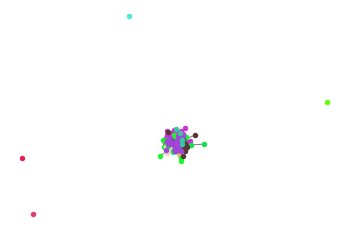

In [ ]:
# Co-terms (title)
G_doc_title = nx.from_numpy_matrix(adj_title)

# Apply Louvain algorithm
partition_title = community.best_partition(G_doc_title)
print("partition", partition_title)

# Modularity
modularity_value = community.modularity(partition_title, G_doc_title) 
print("modularity_value", modularity_value)

# Visulalisation of the number of communities found 
vect_label = set(partition_title.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_title.values()))) 
print("size", size)
 # Generate a vector of colors
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]

# Plot the graph 
pos = nx.spring_layout(G_doc_title) 
count = 0 
for com in set(partition_title.values()) : 
    list_nodes = [nodes for nodes in partition_title.keys() if partition_title[nodes] == com]        
    nx.draw_networkx_nodes(G_doc_title, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(G_doc_title, pos, alpha=0.5) 
plt.axis("off") 
plt.show()

### **Abstract**

partition {0: 0, 1: 1, 2: 0, 3: 0, 4: 1, 5: 1, 6: 2, 7: 1, 8: 1, 9: 1, 10: 0, 11: 0, 12: 1, 13: 1, 14: 1, 15: 1, 16: 1, 17: 0, 18: 0, 19: 3, 20: 0, 21: 2, 22: 2, 23: 1, 24: 1, 25: 1, 26: 1, 27: 0, 28: 1, 29: 1, 30: 0, 31: 0, 32: 1, 33: 2, 34: 1, 35: 1, 36: 0, 37: 0, 38: 1, 39: 1, 40: 1, 41: 0, 42: 2, 43: 1, 44: 1, 45: 1, 46: 0, 47: 2, 48: 1, 49: 3, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 0, 58: 1, 59: 0, 60: 1, 61: 2, 62: 1, 63: 1, 64: 1, 65: 1, 66: 0, 67: 0, 68: 0, 69: 1, 70: 0, 71: 1, 72: 0, 73: 0, 74: 1, 75: 1, 76: 1, 77: 0, 78: 1, 79: 2, 80: 0, 81: 1, 82: 2, 83: 1, 84: 1, 85: 0, 86: 1, 87: 0, 88: 0, 89: 3, 90: 1, 91: 1, 92: 0, 93: 0, 94: 1, 95: 3, 96: 2, 97: 0, 98: 3, 99: 2, 100: 3, 101: 1, 102: 1, 103: 1, 104: 1, 105: 1, 106: 1, 107: 0, 108: 1, 109: 0, 110: 1, 111: 0, 112: 0, 113: 0, 114: 0, 115: 1, 116: 2, 117: 0, 118: 1, 119: 1, 120: 2, 121: 1, 122: 1, 123: 1, 124: 0, 125: 1, 126: 1, 127: 1, 128: 1, 129: 1, 130: 0, 131: 1, 132: 1, 133: 2, 134: 1, 135: 0, 136: 0, 137

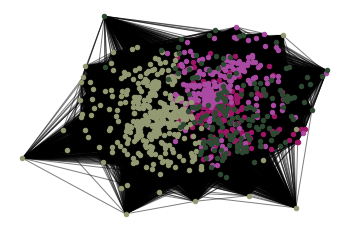

In [ ]:
# Graph co-terms (abstract)

G_doc_abstract = nx.from_numpy_matrix(adj_abstract)

# Apply Louvain algorithm
partition_abstract = community.best_partition(G_doc_abstract)
print("partition", partition_abstract)

# Modularity
modularity_value = community.modularity(partition_abstract, G_doc_abstract) 
print("modularity_value", modularity_value)

# Visulalisation of the number of communities found 
vect_label = set(partition_abstract.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_abstract.values()))) 
print("size", size) 

# Generate a vector of colors
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]

# Plot the graph 
pos = nx.spring_layout(G_doc_abstract) 
count = 0 
for com in set(partition_abstract.values()) : 
    list_nodes = [nodes for nodes in partition_abstract.keys() if partition_abstract[nodes] == com]        
    nx.draw_networkx_nodes(G_doc_abstract, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(G_doc_abstract, pos, alpha=0.5) 
plt.axis("off") 
plt.show()

### **Authors**

partition {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 0, 15: 14, 16: 15, 17: 16, 18: 6, 19: 17, 20: 0, 21: 18, 22: 19, 23: 0, 24: 20, 25: 17, 26: 21, 27: 22, 28: 6, 29: 23, 30: 19, 31: 24, 32: 25, 33: 26, 34: 27, 35: 28, 36: 21, 37: 29, 38: 30, 39: 31, 40: 32, 41: 17, 42: 33, 43: 34, 44: 35, 45: 17, 46: 36, 47: 37, 48: 38, 49: 39, 50: 40, 51: 41, 52: 0, 53: 21, 54: 42, 55: 43, 56: 44, 57: 45, 58: 46, 59: 47, 60: 48, 61: 49, 62: 50, 63: 51, 64: 52, 65: 53, 66: 54, 67: 54, 68: 20, 69: 55, 70: 56, 71: 16, 72: 30, 73: 57, 74: 58, 75: 6, 76: 48, 77: 53, 78: 59, 79: 60, 80: 0, 81: 0, 82: 61, 83: 12, 84: 6, 85: 62, 86: 63, 87: 64, 88: 65, 89: 66, 90: 15, 91: 6, 92: 53, 93: 14, 94: 6, 95: 67, 96: 68, 97: 15, 98: 17, 99: 6, 100: 69, 101: 70, 102: 71, 103: 72, 104: 20, 105: 73, 106: 34, 107: 6, 108: 34, 109: 32, 110: 73, 111: 16, 112: 74, 113: 0, 114: 20, 115: 73, 116: 75, 117: 76, 118: 77, 119: 78, 120: 6, 121: 79, 122: 80, 123: 81, 124: 17, 

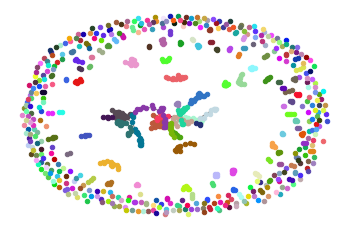

In [ ]:
# Graph co-authors

G_doc_authors = nx.from_numpy_matrix(adj_author)

# Apply Louvain algorithm
partition_authors = community.best_partition(G_doc_authors)
print("partition", partition_authors)

# Modularity
modularity_value = community.modularity(partition_authors, G_doc_authors) 
print("modularity_value", modularity_value)

# Visulalisation of the number of communities found 
vect_label = set(partition_authors.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_authors.values()))) 
print("size", size) 

# Generate a vector of colors
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]

# Plot the graph 
pos = nx.spring_layout(G_doc_authors) 
count = 0 
for com in set(partition_authors.values()) : 
    list_nodes = [nodes for nodes in partition_authors.keys() if partition_authors[nodes] == com]        
    nx.draw_networkx_nodes(G_doc_authors, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(G_doc_authors, pos, alpha=0.5) 
plt.axis("off") 
plt.show()

### **Citations**

partition {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 5, 7: 6, 8: 7, 9: 5, 10: 5, 11: 1, 12: 5, 13: 1, 14: 2, 15: 8, 16: 9, 17: 10, 18: 5, 19: 7, 20: 11, 21: 1, 22: 12, 23: 13, 24: 14, 25: 15, 26: 4, 27: 16, 28: 5, 29: 1, 30: 17, 31: 4, 32: 7, 33: 18, 34: 5, 35: 19, 36: 20, 37: 21, 38: 5, 39: 22, 40: 3, 41: 5, 42: 13, 43: 23, 44: 24, 45: 13, 46: 8, 47: 1, 48: 25, 49: 26, 50: 23, 51: 13, 52: 13, 53: 4, 54: 1, 55: 16, 56: 11, 57: 3, 58: 3, 59: 27, 60: 3, 61: 11, 62: 28, 63: 2, 64: 1, 65: 5, 66: 22, 67: 22, 68: 2, 69: 29, 70: 12, 71: 2, 72: 5, 73: 22, 74: 30, 75: 13, 76: 5, 77: 4, 78: 1, 79: 7, 80: 2, 81: 1, 82: 22, 83: 5, 84: 7, 85: 0, 86: 31, 87: 32, 88: 33, 89: 1, 90: 13, 91: 3, 92: 5, 93: 17, 94: 5, 95: 2, 96: 2, 97: 22, 98: 34, 99: 3, 100: 35, 101: 9, 102: 13, 103: 36, 104: 22, 105: 37, 106: 34, 107: 3, 108: 38, 109: 18, 110: 1, 111: 22, 112: 5, 113: 17, 114: 4, 115: 1, 116: 39, 117: 22, 118: 2, 119: 5, 120: 40, 121: 3, 122: 13, 123: 41, 124: 2, 125: 42, 126: 34, 127: 13, 128: 1, 129: 5,

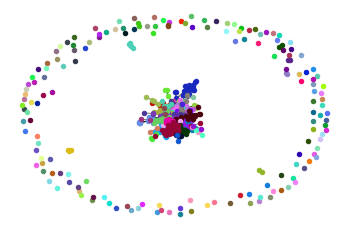

In [ ]:
# Graph co-citations

G_doc_citations = nx.from_numpy_matrix(adj_citations)

# Application of Louvain algorithm
partition_citations = community.best_partition(G_doc_citations)
print("partition", partition_citations)

# Modularity
modularity_value = community.modularity(partition_citations, G_doc_citations) 
print("modularity_value", modularity_value)

# Visulalisation of the number of communities found 
vect_label = set(partition_citations.values()) 
print("vect_label", vect_label) 
size = int(len(set(partition_citations.values()))) 
print("size", size) 

# Generate a vector of colors
colors= ["#"+''.join([choice('0123456789ABCDEF') for j in range(6)]) for i in range(size)]

# Plot the graph 
pos = nx.spring_layout(G_doc_citations) 
count = 0 
for com in set(partition_citations.values()) : 
    list_nodes = [nodes for nodes in partition_citations.keys() if partition_citations[nodes] == com]        
    nx.draw_networkx_nodes(G_doc_citations, pos, list_nodes, node_size = 20, node_color = (colors[count])) 
    count += 1 
nx.draw_networkx_edges(G_doc_citations, pos, alpha=0.5) 
plt.axis("off") 
plt.show()

## **Consensus**

In [ ]:
#Consensus
import Cluster_Ensembles as CE
cluster_runs = np.array([list(partition_title.values()),
                         list(partition_abstract.values()),
                         list(partition_authors.values()),
                         list(partition_citations.values())])
print("cluster_runs", cluster_runs) 
consensus_clustering_labels = CE.cluster_ensembles(cluster_runs, verbose = True, N_clusters_max = 16)
print("consensus_clustering_labels", consensus_clustering_labels)

cluster_runs [[  0   1   0 ...   8   8   0]
 [  0   1   0 ...   3   3   0]
 [  0   1   2 ... 358 323 311]
 [  0   1   2 ...  12  17 141]]
*****
INFO: Cluster_Ensembles: CSPA: consensus clustering using CSPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_CSPA.
#

#
INFO: Cluster_Ensembles: sgraph: calling gpmetis for graph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_CSPA.part.16
#

INFO: Cluster_Ensembles: cluster_ensembles: CSPA at 0.5022249030157563.
*****

*****
INFO: Cluster_Ensembles: HGPA: consensus clustering using HGPA.

#
INFO: Cluster_Ensembles: wgraph: writing wgraph_HGPA.
INFO: Cluster_Ensembles: wgraph: 888 vertices and 672 non-zero hyper-edges.
#

#
INFO: Cluster_Ensembles: sgraph: calling shmetis for hypergraph partitioning.
INFO: Cluster_Ensembles: sgraph: (hyper)-graph partitioning completed; loading wgraph_HGPA.part.16
#

INFO: Cluster_Ensembles: cluster_ensembles: HGPA at 0.35171143312768427.
*****

*****
IN

In [ ]:
# Export clusters
clusters_cons = consensus_clustering_labels.transpose()
clusters_cons = pd.DataFrame(clusters_cons, columns=["Clusters"], index=df.ID)
clusters_cons.to_csv(r'clusters_cons.csv', index=True, header=True)